In [ ]:
import pandas as pd

**Importing & Inspecting the data**

In [ ]:
#Importing the the training and test data for PC_final option 2
tr = "final_option2_training_data.csv"
te = "final_option2_test_data_without_prices.csv"

train_df = pd.read_csv(tr)
test_df = pd.read_csv(te)

# Creating a copy of df
df = train_df 
train_df = train_df.replace(['NULL'],np.nan)

# Printing out the layout of the Training and Test data  
display(train_df.head())
display(test_df.head())

,price,year,odometer,cylinders,transmission,drive,type,paint_color,size,condition,...,model,region,title_status,posting_date,description_length,description_credit,description_owner,description_badcredit,description,training
0,39998,2020.0,3638.0,6.0,automatic,4wd,truck,NaN,NaN,NaN,...,canyon,missoula,clean,2020-11-06T08:02:21-0700,5619.0,1,1,0,For more information on thisÂ GMC and to acces...,1
1,26990,2015.0,102863.0,4.0,automatic,rwd,truck,white,full-size,good,...,Isuzu NPR,louisville,clean,2020-11-14T16:07:45-0500,2466.0,0,0,0,2015 Isuzu NPR REEFER & FREEZER UNIT - $26 990...,1
2,9500,2014.0,NaN,4.0,automatic,4wd,sedan,white,mid-size,good,...,320i xdrive,columbia / jeff city,clean,2020-11-16T10:27:19-0600,309.0,0,0,0,For Sale - 2014 One-owner BMW 320i xDrive seda...,1
3,28995,2015.0,120805.0,8.0,automatic,4wd,SUV,white,full-size,excellent,...,qx80,fargo / moorhead,clean,2020-11-21T13:39:30-0600,1238.0,0,1,0,CERTIFIED PRE OWNEDâ4X4âONE OWNERâTHIRD ...,1
4,34500,1934.0,1200.0,8.0,automatic,rwd,NaN,blue,NaN,excellent,...,1934 pylmouth,washington DC,clean,2020-11-26T16:34:25-0500,366.0,0,0,0,1934 Plymouth coupe recent built from 100% rus...,1


,year,odometer,cylinders,transmission,drive,type,paint_color,size,condition,fuel,...,model,region,title_status,posting_date,description_length,description_credit,description_owner,description_badcredit,description,training
0,2008.0,60800.0,8.0,automatic,NaN,NaN,NaN,NaN,excellent,diesel,...,f350 dually,glens falls,clean,2020-11-27T18:19:23-0500,200.0,0,1,0,2008 Ford F350 Dually 4x4 w/ Fisher Minute Mou...,0
1,2017.0,55000.0,4.0,automatic,rwd,hatchback,white,full-size,excellent,gas,...,prius prime premium,birmingham,rebuilt,2020-11-28T16:59:13-0600,437.0,0,0,0,For sale is my Prius Prime. This is a plug-in ...,0
2,2013.0,NaN,4.0,automatic,fwd,sedan,grey,compact,excellent,gas,...,civic,modesto,clean,2020-11-28T14:50:25-0800,412.0,1,0,1,2013 Honda Civic EX-L Mileage: 116 991 miles M...,0
3,2018.0,36518.0,NaN,automatic,fwd,sedan,silver,full-size,NaN,gas,...,optima,winchester,clean,2020-11-13T11:45:39-0500,2796.0,1,0,1,2018 KIA OPTIMA EX Offered by: Insiders Auto S...,0
4,2017.0,53281.0,NaN,automatic,fwd,sedan,black,NaN,good,other,...,cc 2.0t sport sedan,albany,clean,2020-11-22T13:43:34-0500,4440.0,1,0,0,Carvana is the safer way to buy a car During t...,0


**Feature Selection**: In this section, we will examine the data and pick features.
 

In [ ]:
#First let's explore the columns of the data to aid in feature selection
col_vals = {}
for col in train_df.columns:
  
  #Note that we're printing the cols with less than 5 unqiue value just for
  #submission, since printing all the values would be too messy to understand.
  #While actually analysing, all the column values were observed
  if col != "price" and train_df[col].nunique() < 5:
    print(str(train_df[col].value_counts(dropna=False)) + "\n")

automatic    171996
other         15135
manual        11983
NaN             886
Name: transmission, dtype: int64

4wd    60396
NaN    56841
fwd    54823
rwd    27940
Name: drive, dtype: int64

NaN            140171
full-size       30444
mid-size        18445
compact          9437
sub-compact      1503
Name: size, dtype: int64

0    117301
1     82699
Name: description_credit, dtype: int64

0    162998
1     37002
Name: description_owner, dtype: int64

0    168974
1     31026
Name: description_badcredit, dtype: int64

1    200000
Name: training, dtype: int64



In [ ]:
#In this code block we will examine the data and pick features.
#Now let's look at the correlation between the numerical columns and price
train_df.corr()["price"].sort_values()


odometer                -0.530513
description_owner        0.042878
description_badcredit    0.055810
description_credit       0.303728
cylinders                0.357777
year                     0.370169
description_length       0.406942
price                    1.000000
training                      NaN
Name: price, dtype: float64

In [ ]:
#With that done, let's begin dropping unwanted/insignificant features
drop_cols = []

#We will drop the training column. It is 1 for all points in the 
#training set and 0 for all in the test and hence would have no impact on our
#model.
drop_cols.append("training")

#Similarly, the description_badcredit and description_owner have very low
#correlation with price and hence we drop these columns too
drop_cols.extend(["description_badcredit", "description_owner"])

train_df = train_df.drop(drop_cols, axis=1)
test_df = test_df.drop(drop_cols, axis=1)

#Let's verify that the expected columns have been dropped
train_df.head()

,price,year,odometer,cylinders,transmission,drive,type,paint_color,size,condition,fuel,state,manufacturer,model,region,title_status,posting_date,description_length,description_credit,description
0,39998,2020.0,3638.0,6.0,automatic,4wd,truck,NaN,NaN,NaN,gas,mt,gmc,canyon,missoula,clean,2020-11-06T08:02:21-0700,5619.0,1,For more information on thisÂ GMC and to acces...
1,26990,2015.0,102863.0,4.0,automatic,rwd,truck,white,full-size,good,diesel,ky,NaN,Isuzu NPR,louisville,clean,2020-11-14T16:07:45-0500,2466.0,0,2015 Isuzu NPR REEFER & FREEZER UNIT - $26 990...
2,9500,2014.0,NaN,4.0,automatic,4wd,sedan,white,mid-size,good,gas,mo,bmw,320i xdrive,columbia / jeff city,clean,2020-11-16T10:27:19-0600,309.0,0,For Sale - 2014 One-owner BMW 320i xDrive seda...
3,28995,2015.0,120805.0,8.0,automatic,4wd,SUV,white,full-size,excellent,gas,mn,infiniti,qx80,fargo / moorhead,clean,2020-11-21T13:39:30-0600,1238.0,0,CERTIFIED PRE OWNEDâ4X4âONE OWNERâTHIRD ...
4,34500,1934.0,1200.0,8.0,automatic,rwd,NaN,blue,NaN,excellent,gas,dc,NaN,1934 pylmouth,washington DC,clean,2020-11-26T16:34:25-0500,366.0,0,1934 Plymouth coupe recent built from 100% rus...


**Cleaning the Data**: With the final features selected, let's now clean the data in this section

In [ ]:
#With the final features selected, let's now clean the data 
#in this code block
from pandas.core.arrays.sparse import dtype
from sklearn.feature_extraction.text import TfidfVectorizer

#First, we will remove duplicate entries from the train data
train_df = train_df.drop_duplicates()
#verify that there are no more duplicate rows
train_df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
199995    False
199996    False
199997    False
199998    False
199999    False
Length: 199707, dtype: bool

In [ ]:
#Next, we will come up with strategies for null values
number_cols = test_df.select_dtypes(exclude=[object])
string_cols = test_df.select_dtypes(include=[object])

#In the columns with numbers, replace null with 0s
for col in number_cols:
  train_df[col] =  train_df[col].fillna(0)
  test_df[col] =  test_df[col].fillna(0)

#In the columns with string, replace null with a new category
# for col in string_cols:
#   train_df[col] =  train_df[col].fillna("not_given")
#   test_df[col] =  test_df[col].fillna("not_given")


train_df = train_df.apply(lambda x: x.fillna(x.value_counts().index[0]))
test_df = test_df.apply(lambda x: x.fillna(x.value_counts().index[0]))

#Next, we will format all the string cols to be uppercase, with only 
#alphanumeric characters (ie no whitespace or special characters)

for col in string_cols:

    #for the description column, we need a tfid vectorizer to convert the words to a matrix
    if(col == "description"):
      tfidvectorizer = TfidfVectorizer()
      train_df["description"] = tfidvectorizer.fit_transform(train_df["description"]).getnnz()
      test_df["description"] = tfidvectorizer.fit_transform(test_df["description"]).getnnz()
      
    else:
      train_df[col] = train_df[col].str.upper()
      train_df[col] = train_df[col].str.replace('[^A-Za-z0-9]+', '')

      test_df[col] = test_df[col].str.upper()
      test_df[col] = test_df[col].str.replace('[^A-Za-z0-9]+', '')

<ipython-input-6-211040c2d9a7>:32: FutureWarning: The default value of regex will change from True to False in a future version.
  train_df[col] = train_df[col].str.replace('[^A-Za-z0-9]+', '')
<ipython-input-6-211040c2d9a7>:35: FutureWarning: The default value of regex will change from True to False in a future version.
  test_df[col] = test_df[col].str.replace('[^A-Za-z0-9]+', '')


**Preprocessing**

In [ ]:
#With the features selected and data cleaned, let's now start preprocessing
#Since we have non-number, categorical columns, we will encode them
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)

for col in string_cols:
  train_df[[col]] = encoder.fit_transform(train_df[[col]])
  test_df[[col]] = encoder.fit_transform(test_df[[col]])

train_df.to_csv('file1.csv')
#We will also create a variable for log of the price, since that's what we want
#predict
import numpy as np
train_df["log_price"] = np.log(train_df["price"])

LinAlgError: ignored

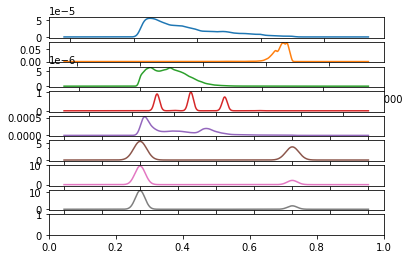

In [ ]:
# Univariate Density Plots
import matplotlib.pyplot as plt

train_df.plot(kind='density', subplots=True, sharex=False)
plt.show()

**Splitting the Data into test and train**

In [ ]:
#With the pre-processing complete, we can begin training a model
#x is all the features selected
x = train_df.drop(['price', 'log_price'], axis=1)

#y is log of prices.
y = train_df['log_price']
from sklearn.model_selection import train_test_split
# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15)

**Training the Models!**

In [ ]:
#We're finally ready to train our models. We will use several different
#regression models to predict log of car prices with the lowest MSE. We'll
#also track the R^2 score for reference

from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pickle

LR = LinearRegression()
DTR = DecisionTreeRegressor()
RFR = RandomForestRegressor()
KNR = KNeighborsRegressor()
MLP = MLPRegressor()
XGB = XGBRegressor()

#We'll create a list of models and loop through them when training
# models = [LR,DTR,RFR,KNR,KNR,XGB]
models = [RFR]

#We'll also store the MSE and R^2 of each model in dictionaires
mse = {}
r2 = {}

#Keep track of the final model, ie the model with the least MSE
min_mse = 1
final_model = LR

#Note that this code section might take a while, we're training and predicting on
#all 6 models!
for index, model in enumerate(models):
  model.fit(x_train, y_train)

  pred = model.predict(x_test)
  curr_mse = mean_squared_error(pred,y_test) 
  mse.update({str(model): curr_mse})
  r2.update({str(model):r2_score(y_test, pred)})

  if(curr_mse < min_mse):
    final_model = model

  #save the model, just in case 
  filename = str(model) + ".json"
  if(index == 5):
    model.save_model("XGB")
  else:
    pickle.dump(model, open(filename, 'wb'))

#print the MSE, R^2 and the selected model (ie the model with lowest MSE)
print(mse)
print(r2)
print(final_model)

  

{'RandomForestRegressor()': 0.07617625082297369}
{'RandomForestRegressor()': 0.8722113728363164}
RandomForestRegressor()


{    'LinearRegression()': 0.37857611035587274,                                   
   'DecisionTreeRegressor()': 0.16107919044405336,                  
   'RandomForestRegressor()': 0.07804912663644738,              
   'KNeighborsRegressor()': 0.34306095685828003,                          
   'XGBRegressor()': 0.07790850400937645   }


{    'LinearRegression()': 0.36100144880031426,                 
  'DecisionTreeRegressor()': 0.7281144623061088,                             
  'RandomForestRegressor()': 0.8682608926479584,                   
  'KNeighborsRegressor()': 0.4209474702470005,              
  'XGBRegressor()': 0.8684982495558725     }

*XGBRegressor()*

In [ ]:
sorted_mse = sorted(mse.items(), key=lambda x:x[1])
mse_dict = dict(sorted_mse)

sorted_r2 = sorted(r2.items(), key=lambda x:x[1])
r2_dict = dict(sorted_r2)

print("{:<30} {:<10}".format('Key','MSE'))
for k, v in mse_dict.items():
    print("{:<30} {:<10}".format(k,v))

print("{:<30} {:<10}".format('Key','R2'))
for k, v in r2_dict.items():
    print("{:<30} {:<10}".format(k,v))
    # 0.07672055284926843
# XGBRegressor()                 0.13335992370093477
# Key                            R2        
# XGBRegressor()                 0.7735110426207298
# RandomForestRegressor()        0.8697032995957675

Key                            MSE       
RandomForestRegressor()        0.07617625082297369
Key                            R2        
RandomForestRegressor()        0.8722113728363164


In [ ]:
# # # # Note this file takes more than an hour to run and crashes cuz google colab
# #  doesnt have ram for it used kaggle instead
# # 
# # !! REsults from kaggle increased mse somehow !!
# # 

# from sklearn.model_selection import RandomizedSearchCV
# # Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 3)]
# # Number of features to consider at every split
# max_features = ['auto', 'sqrt']
# # Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(10, 110, num = 3)]
# max_depth.append(None)
# # Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4]
# # Method of selecting samples for training each tree
# bootstrap = [True, False]
# # Create the random grid
# random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}
# print(random_grid)

# # Use the random grid to search for best hyperparameters
# # First create the base model to tune
# rf = RandomForestRegressor()
# # Random search of parameters, using 3 fold cross validation, 
# # search across 100 different combinations, and use all available cores
# rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# # Fit the random search model
# rf_random.fit(x_train, y_train)

# rf_random.best_params_

In [ ]:
# # for i in range(300,1300,200):
# #   RFR_trained = RandomForestRegressor(n_estimators = i, bootstrap = True)
# #   RFR_trained.fit(x_train, y_train)
# #   pred = RFR_trained.predict(x_test)
# #   curr_mse = mean_squared_error(pred,y_test) 
# #   print("\ni  =\n", i ,{"RFR_Trained": curr_mse})
# #   # i+=5

# RFR_trained = RandomForestRegressor(n_estimators = 200, min_samples_split = 5, max_features= 'sqrt', max_depth= 45, bootstrap = True)
# RFR_trained.fit(x_train, y_train)
# pred = RFR_trained.predict(x_test)
# curr_mse = mean_squared_error(pred,y_test) 
# print("\ni  =\n" ,{"RFR_Trained": curr_mse})

In [ ]:
# from sklearn.model_selection import RandomizedSearchCV
# from pprint import pprint
# import numpy as np

# # Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 20, stop = 200, num = 5)]
# # Number of features to consider at every split
# max_features = ['auto', 'sqrt']
# # Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(1, 45, num = 3)]
# # Minimum number of samples required to split a node
# min_samples_split = [5, 10]

# # Create the random grid
# random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split}

# pprint(random_grid)

# rf_random = RandomizedSearchCV(estimator = RFR, param_distributions = random_grid, n_iter = 10, cv = 10, random_state=42, n_jobs = -1, scoring='neg_mean_squared_error', verbose = 15)
# # Fit the random search model
# rf_random.fit(x_train, y_train)

# cvres2 = rf_random.cv_results_
# for mean_score, params in zip(cvres2["mean_test_score"], cvres2["params"]):
#     print(np.sqrt(-mean_score), params)
    

Now to perform **Parameter Tuning** on our chosen regressor, with lowest MSE - Random Forest

In [ ]:
# # Note this file takes more than 3 hours to run

from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 3)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 3)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,
                                n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train, y_train)
print(rf_random.best_params_)

{'n_estimators': 200, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 45, 'bootstrap': True}


Running Parameterised Regressor

In [ ]:
RFR_trained = RandomForestRegressor(n_estimators = 200, min_samples_split = 5,
                                    max_features= 'sqrt', max_depth= 45, bootstrap = True)
RFR_trained.fit(x_train, y_train)
pred = RFR_trained.predict(x_test)
curr_mse = mean_squared_error(pred,y_test) 
final_model = RFR_trained
print({"RFR_Trained": curr_mse})

{'RFR_Trained': 0.07296931365318118}


**Returning Predicted CSV**

In [ ]:

final_preds = final_model.predict(test_df)
prediction = pd.DataFrame(final_preds, columns=['predictions']).to_csv('Answer.csv')